# Risk of Cardiovascular Heart Disease in 10 Years

## Data Uploading and Cleaning

#### Imports and testing the CSV file uploaded correctly

In [744]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import phik
from phik import phik_matrix

In [745]:
df = pd.read_csv('train.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#### Seeing if there are any missing values

In [746]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

#### There are quite a few missing values, lets just focus on the missing values

In [747]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


#### We can see the missing data count and the corresponding missing data percentage. The biggest offender is glucose with 304 missing data points and that being almost 9% of the data missing.

#### I decided that it was best to replace missing values either by calculating median (for numerical values) or mode (for categorical values)

In [748]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [749]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])

#### We now see that there is no more missing data, and we don't have any duplicates

In [750]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [751]:
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


#### I decided to change 'is_smoking' and 'sex' columns from 'yes' and no' and 'F' and 'M' to 1 and 0 to make analysis easier later on

In [752]:
d={"YES":1,"NO":0}
df['is_smoking'] = df['is_smoking'].map(d)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [753]:
d={"M":1,"F":0}
df['sex'] = df['sex'].map(d)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [754]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.7500,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
education,3390.0,1.946018,1.017568,1.00,1.00,2.00,3.0000,4.0
sex,3390.0,0.432743,0.495529,0.00,0.00,0.00,1.0000,1.0
is_smoking,3390.0,0.497640,0.500068,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.0000,1.0


## Exploratory Data Analysis

#### Since we are looking at the Ten Year Risk of CHD I wanted to see the distribution of those with and without ten year CHD risk

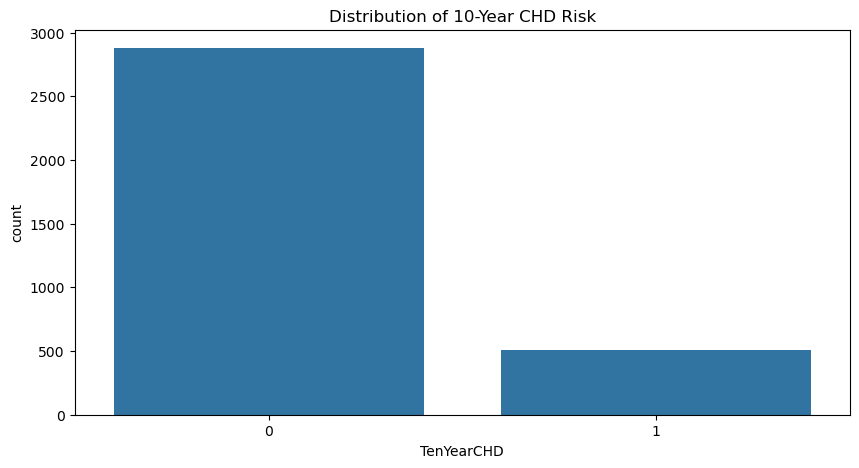

In [755]:
sns.countplot(data=df, x='TenYearCHD')
plt.title("Distribution of 10-Year CHD Risk")
plt.show()

#### I first started off correlating all variables with TenYearCHD to find out where to start. I organized the chart and subsequent graph by most correlated to least correlated.

In [756]:
correlation_with_TYCHD = df.corr()['TenYearCHD'].sort_values(ascending=False)

print(correlation_with_TYCHD)

TenYearCHD         1.000000
age                0.224927
sysBP              0.212703
prevalentHyp       0.166544
diaBP              0.135979
glucose            0.133472
diabetes           0.103681
totChol            0.093605
BPMeds             0.087349
sex                0.084647
prevalentStroke    0.068627
cigsPerDay         0.068020
BMI                0.066134
is_smoking         0.034143
heartRate          0.020167
id                 0.009866
education         -0.051388
Name: TenYearCHD, dtype: float64


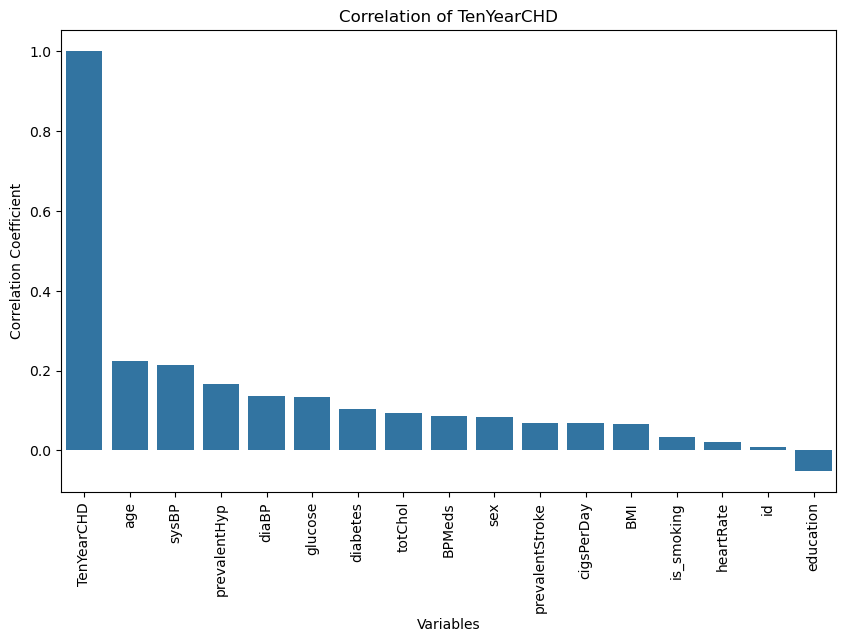

In [757]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_TYCHD.index, y=correlation_with_TYCHD.values)
plt.title('Correlation of TenYearCHD')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

#### So we can see from the chart and graph that the top 5 correlated variables are age, systolic blood pressure, prevalent hypertension, diastolic blood pressure, and glucose. Interestingly there is a negative correlation in education.

#### I then made a heat map to see if there are other correlations

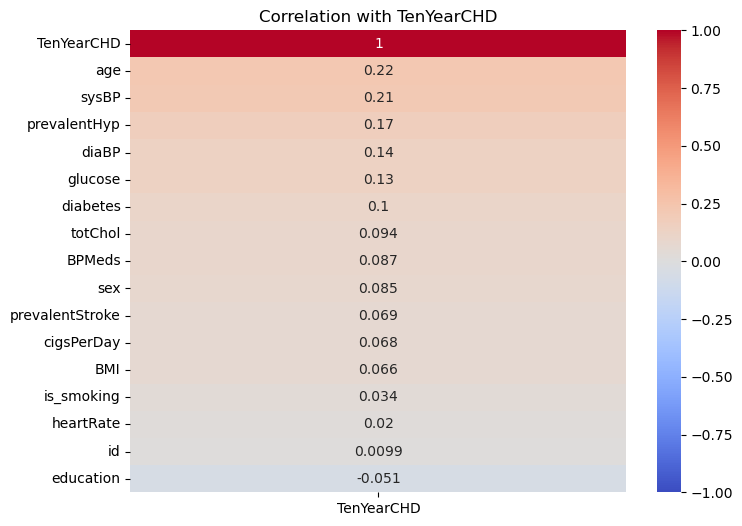

In [758]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix[['TenYearCHD']].sort_values(by='TenYearCHD', ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title("Correlation with TenYearCHD")
plt.show()

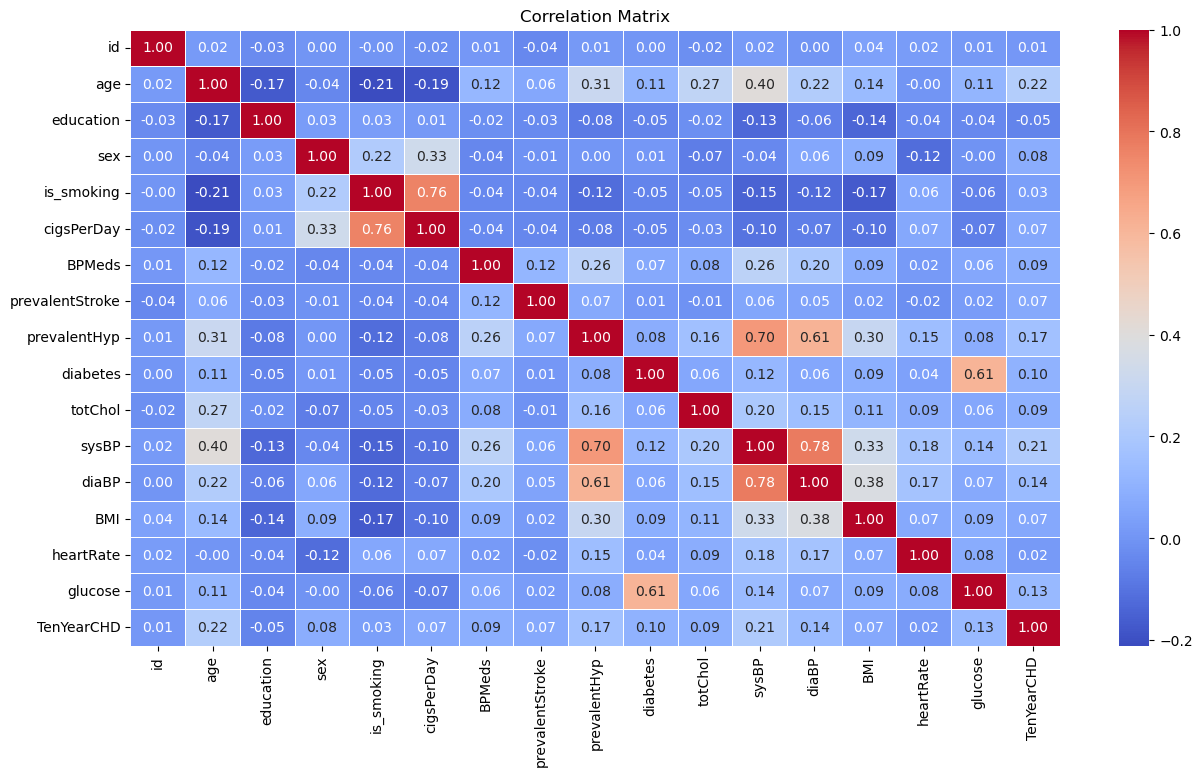

In [759]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### In the heat map we can see that there are other correlations that exist and they don't stand out to me. What I found kind of interesting is that education had a lot of negative correlations, so as education increased, other medical problems went down, including TenYearCHD.

#### I wanted to look at age since that was the highest correlation with ten year CHD

Text(0.5, 1.0, 'Age Distrubution')

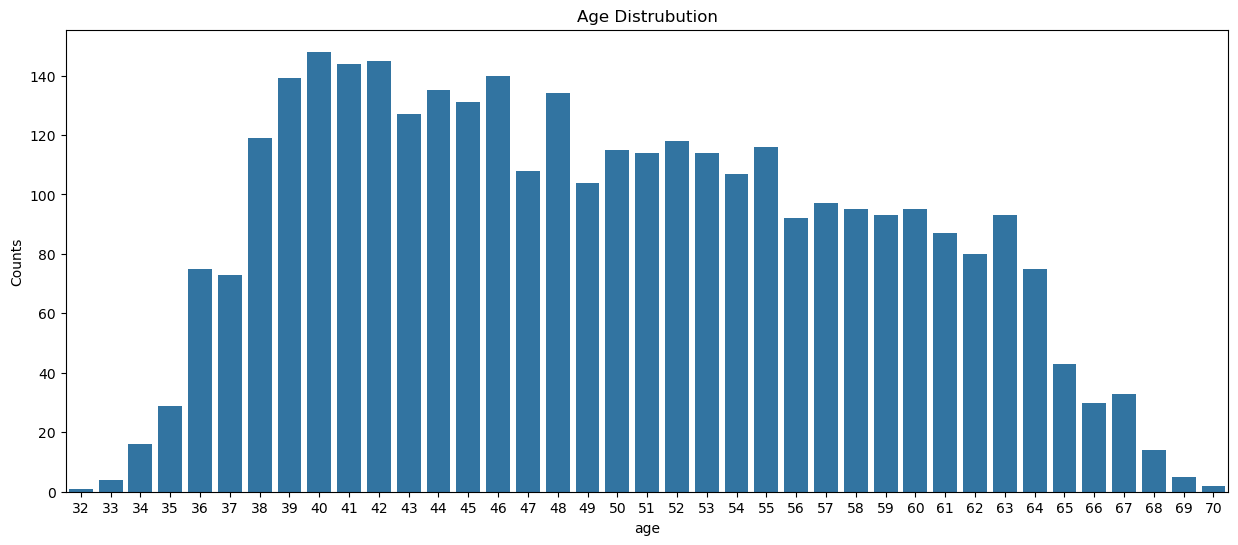

In [760]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')

Text(0.5, 1.0, 'Age wise Effected People')

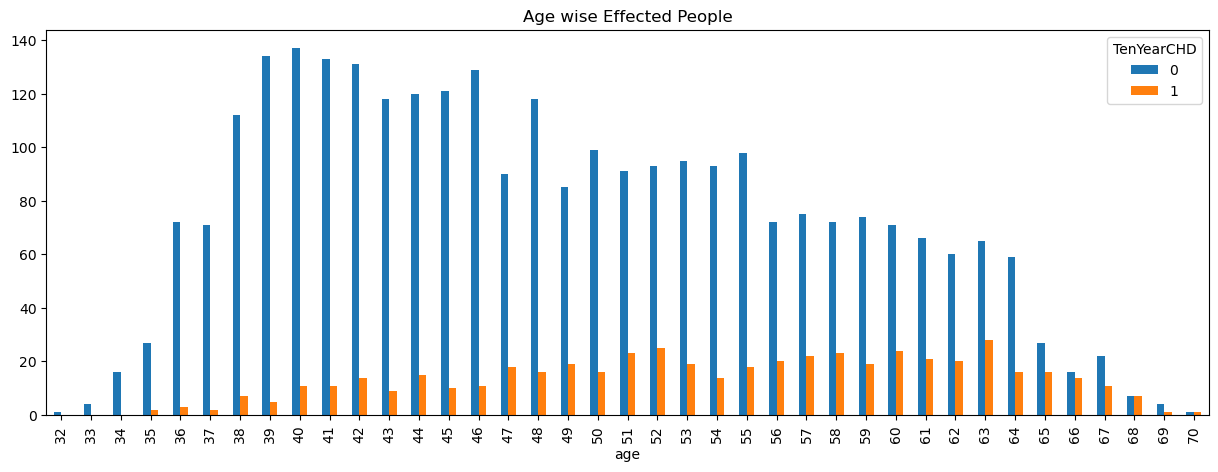

In [761]:
plt.rcParams['figure.figsize'] = (15, 5)
df.groupby(['age','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Age wise Effected People')

#### Age starts just after 30, peaks at about 40 and slowly declines after that. Ten year CHD increasres as age increases peaking at 63 and declining from there, I'm assuming due to death.

#### Next I looked at Prevalent Hypertension which is the next highest correlated variable with TenYearCHD

Text(0.5, 1.0, 'Prevalent Hypertension persons Proposanate')

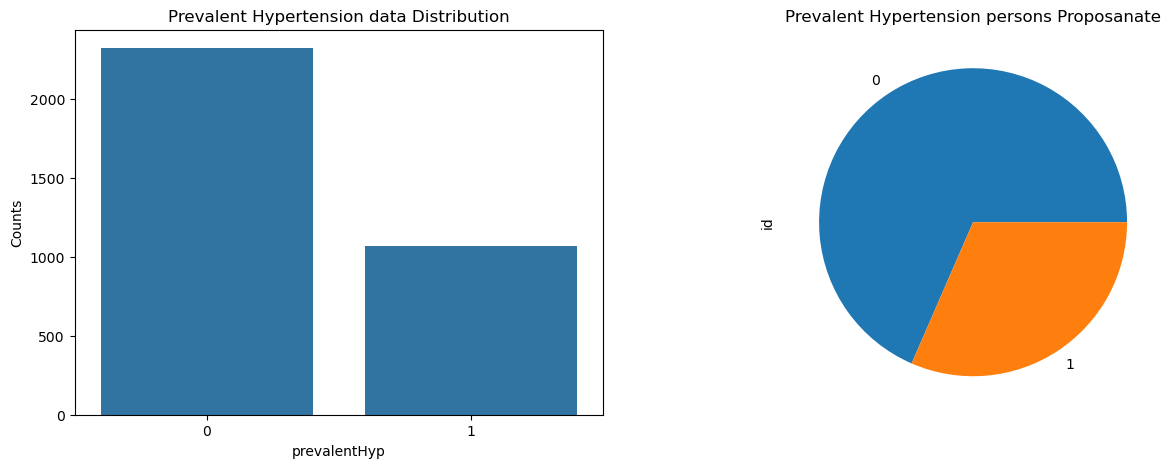

In [762]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['prevalentHyp'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevalentHyp')
plt.ylabel('Counts')
plt.title('Prevalent Hypertension data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['prevalentHyp'])['id'].count().plot(kind='pie')
plt.title('Prevalent Hypertension persons Proposanate')

Text(0.5, 1.0, 'Prevalent Hypertension people distribution with Ten years CHD')

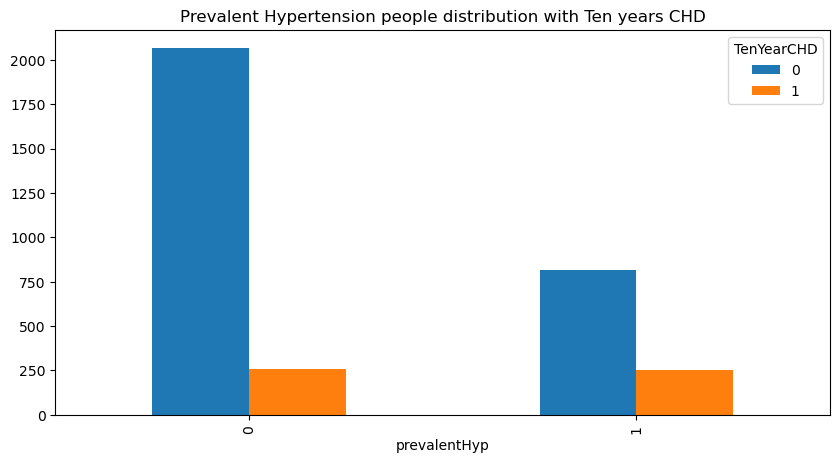

In [763]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['prevalentHyp','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Prevalent Hypertension people distribution with Ten years CHD')

#### It looks like the chances of ten year risk of CHD goes up with prevalent hypertension. I think more importantly it looks like the chances of not developing CHD in ten years goes down with prevalent hypertension.

#### Lastly I looked at education, which has a negative correlation to TenYearCHD

Text(0.5, 1.0, 'Education')

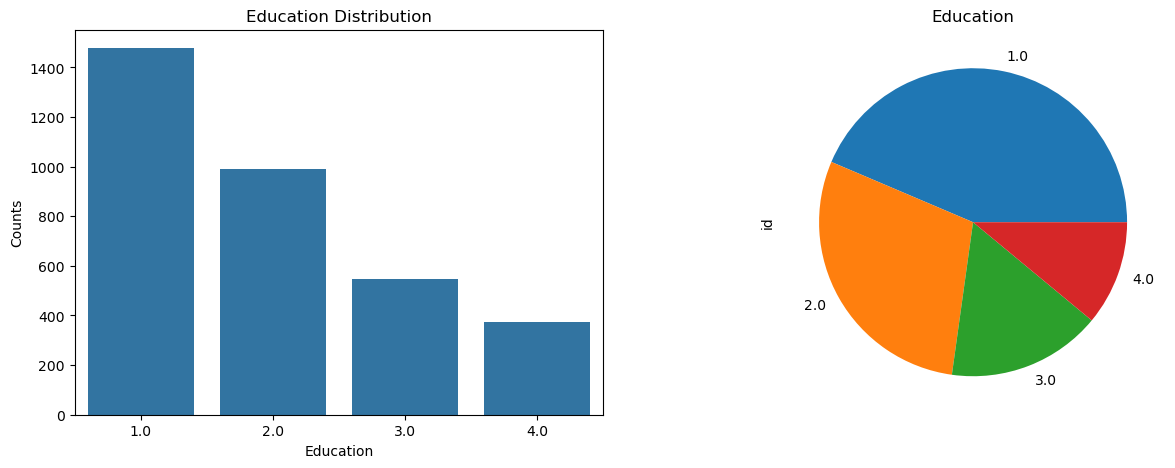

In [764]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['education'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('Education Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['education'])['id'].count().plot(kind='pie')
plt.title('Education')

Text(0.5, 1.0, 'Education with Ten Year CHD Prediction')

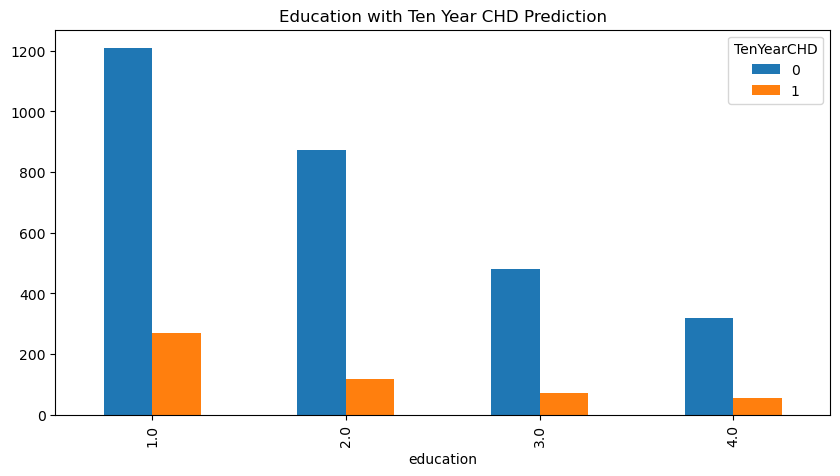

In [765]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['education','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Education with Ten Year CHD Prediction')

#### As there is an increase in education, there is a decrease in the risk of developing CHD in ten years. Those who are more educated would probably have better insurance to see a doctor regularly and to take better care of themselves. 

## Modeling

#### Due to the correlation matrix I decided to drop some columns that I believed to be redundant or unimportant.

In [766]:
df = df.drop(["sysBP","diaBP","glucose","is_smoking", "heartRate", "prevalentStroke", "BPMeds"],axis = 1)
df.head()

,id,age,education,sex,cigsPerDay,prevalentHyp,diabetes,totChol,BMI,TenYearCHD
0,0,64,2.0,0,3.0,0,0,221.0,25.38,1
1,1,36,4.0,1,0.0,1,0,212.0,29.77,0
2,2,46,1.0,0,10.0,0,0,250.0,20.35,0
3,3,50,1.0,1,20.0,1,0,233.0,28.26,1
4,4,64,1.0,0,30.0,0,0,241.0,26.42,0


#### I split the data into training and testing sets, transformed the data, train the logistic model, and calculate the metrics

In [774]:
categorical_feats = ['education', 'sex', 'prevalentHyp', 'diabetes']
numerical_feats = ['age', 'cigsPerDay', 'totChol', 'BMI']

y = df['TenYearCHD']
X = df[categorical_feats + numerical_feats]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
imputer = SimpleImputer(strategy='mean')

X_train_categorical_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_feats]),  
    columns=encoder.get_feature_names_out(categorical_feats),
    index=X_train.index
)

X_train_transformed = X_train.drop(columns=categorical_feats).join(X_train_categorical_encoded)

X_train_transformed[numerical_feats] = imputer.fit_transform(X_train_transformed[numerical_feats])

model = LogisticRegression(max_iter=1000, solver='liblinear') 
model.fit(X_train_transformed, y_train)

y_train_pred = model.predict(X_train_transformed)
y_train_prob = model.predict_proba(X_train_transformed)[:, 1]  

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print(f"Training ROC-AUC: {train_roc_auc}")


Training Accuracy: 0.8528761061946902
Training Precision: 0.7222222222222222
Training Recall: 0.03194103194103194
Training F1 Score: 0.0611764705882353
Training ROC-AUC: 0.7280604603815016


In [773]:
X_test_categorical_encoded = pd.DataFrame(
    encoder.transform(X_test[categorical_feats]),  
    columns=encoder.get_feature_names_out(categorical_feats),
    index=X_test.index
)

X_test_transformed = X_test.drop(columns=categorical_feats).join(X_test_categorical_encoded)
X_test_transformed[numerical_feats] = imputer.transform(X_test_transformed[numerical_feats])

y_test_pred = model.predict(X_test_transformed)
y_test_prob = model.predict_proba(X_test_transformed)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test ROC-AUC: {test_roc_auc}")

Test Accuracy: 0.8525073746312685
Test Precision: 0.75
Test Recall: 0.057692307692307696
Test F1 Score: 0.10714285714285714
Test ROC-AUC: 0.6955407397480569


#### Both the Training and Testing Accuracy is at 85% meaning that this model correctly classifying 85% of instances. 
#### The Training Precision is 72% while the Testing Precision is at 75%. This means that the model predicts a person will develop cardiovascular disease, it is correct 72% of the time in the training model and 75% in the testing model.
#### The Training Recall is 3.2% and the Testing Recall is 5.7% meaning that the model identifies only about 3.19% of the actual cases of cardiovascular disease in the training set and 5.7% in the testing model.
#### The Training F1 Score is .0611 and the Testing F1 Score is .1071 meaning the model is performing poorly in balancing both false positives and false negatives.
#### The Training ROC-AUC score is .728 meaning that the model has a decent ability to distinguish between the two classes in the training data. The Testing ROC-AUC score is .6955 meaning the model’s discrimination ability drops a bit on the test set, but it is still somewhat above random guessing.

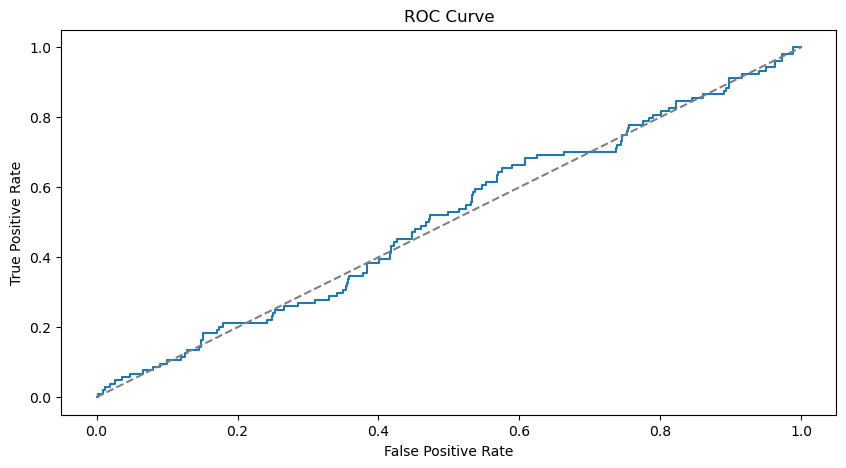

In [768]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### ROC Curve: The Receiver Operating Characteristic curve visualizes the trade-off between the True Positive Rate and False Positive Rate.

#### The dotted line is 0.5, basically the chance of randomly guessing the correct risk for CHD. Sometimes the ROC Curve is above that line, correctly predicting risk of CHD and sometimes the ROC Curve is below that line, incorrectly predicting risk of CHD.

## Predictions

#### I have randomized data for the variables and made a prediction based on that data

In [769]:
new_data = pd.DataFrame({
    'age': [60],
    'education': [3.0],
    'sex': [1],
    'cigsPerDay': [10.0],
    'prevalentHyp': [1],
    'diabetes': [0],
    'totChol': [220.0],
    'BMI': [25.0],
})

new_data_categorical_encoded = pd.DataFrame(
    encoder.transform(new_data[categorical_feats]),  
    columns=encoder.get_feature_names_out(categorical_feats),
    index=new_data.index
)

new_data_transformed = new_data.drop(columns=categorical_feats).join(new_data_categorical_encoded)
new_data_transformed[numerical_feats] = imputer.transform(new_data_transformed[numerical_feats])

new_data_prob = model.predict_proba(new_data_transformed)[:, 1]
print(f"Predicted probability of having cardiovascular disease: {new_data_prob[0]}")

Predicted probability of having cardiovascular disease: 0.3475655603565244


#### The predicted probability of having cardiovascular disease is 34%. Considering an advanced age and this particular data indicated hypertension I would have thought the probability would have been higher. However, considering this data indicates a higher education, that could bring the probability score down.

#### As this data is imbalanced, I made a confusion matrix to evaluate the model's performance more clearly

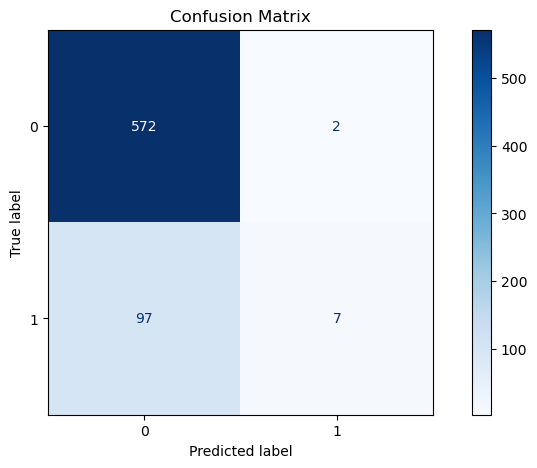

In [770]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_transformed, y_train)  # Fit model on transformed training data

# Step 3: Make predictions on the test data
y_pred = model.predict(X_test_transformed)  # Predict using the test data

# Step 4: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 5: Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### There are 572 True Positives, 7 True Negatives, 97 False Negatives, and 2 False Positives. This model is not performing as well as it could be as the data is quite imbalanced.

In [775]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7777777777777778
Recall: 0.0673076923076923
F1 Score: 0.12389380530973451


#### The Predicted Precision is 77% meaning that the model predicts a person will develop cardiovascular disease, it is correct 77% of the time.
#### The Predicted Recall is 6.7% meaning that the model identifies only about 6.7% of the actual cases of cardiovascular disease.
#### The Predicted F1 Score is .1238 meaning the model is performing poorly in balancing both false positives and false negatives.

## Improvements

#### This data is very imbalanced, the ROC graph is unable to distinguish between a True Positive and a True Negative result.
#### This model is ok at predicting ten year CHD risks but there must be a better model.
####     There could be another model that would fit this data better, exploring alternative evaluation models would be worth looking into.

#### There are so many missing values in this data. Finding a better way to either fill in the data or omit the data that would hopefully better fit the model.

#### There are other variables I think would be interested in looking into such as excersise and diet that could possibly effect risk of CHD.